<h1>Capstone Project - The Battle of the Neighborhoods</h1>

<h3>Applied Data Science Capstone by IBM/Coursera</h3>

<h2>Introduction: Business Problem</h2>

This project aims to select the safest borough in London based on the <b>total crimes</b>, explore the <b>neighborhoods</b> of that borough to find the <b>10 most common venues</b> in each neighborhood and finally cluster the neighborhoods using <b>k-mean clustering</b>.

This report will be targeted to people who are looking to <b>relocate to London</b>. Inorder to finalise a neighborhood to hunt for an apartment, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The <b>crime statistics</b> will provide an insight into this issue.

We will focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

<h3>Data</h3> 
Based on definition of our problem, factors that will influence our decision are:
<ul>
    <li>The total number of crimes commited in each of the borough during the last year.</li>
    <li>The most common venues in each of the neighborhood in the safest borough selected.</li>

Following data sources will be needed to extract/generate the required information:

<b>Part 1:</b> Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016: A dataset consisting of the crime statistics of each borough in London obtained from <b>Kaggle</b> <br> <br>
<b>Part 2:</b> Scraping additional information of the different Boroughs in London from a Wikipedia page.: More information regarding the boroughs of London is scraped using the <b>Beautifulsoup library</b>.<br> <br>
<b>Part 3:</b> Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates.: Co-ordinate of neighborhood will be obtained using <b>Google Maps API geocoding</b>.

<h3>Part 1: Preprocessing a real world data set from Kaggle showing the London Crimes from 2008 to 2016</h3>

<h4>London Crime Data</h4>

About this file:
<ul>
<li>lsoa_code: code for Lower Super Output Area in Greater London. </li>
<li>borough: Common name for London borough. </li>
<li>major_category: High level categorization of crime. </li>
<li>minor_category: Low level categorization of crime within major category. </li>
<li>value: monthly reported count of categorical crime in given borough. </li>
<li>year: Year of reported counts, 2008-2016. </li>
<li>month: Month of reported counts, 1-12. </li>
</ul>

Data set URL: <a href="https://www.kaggle.com/jboysen/london-crime">https://www.kaggle.com/jboysen/london-crime</a>

<h4> Import libraries</h4>

In [46]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!pip install geocoder
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Libraries imported.')

Libraries imported.


<h4>Define Foursquare Credentials and Version</h4>

In [47]:
# Define Foursquare Credentials and Version
LIMIT = 100

CLIENT_ID = 'H5P0AVNBITYYZD1SYMWAQTEGOBAP42SR0QCEBWZVGYHAWFJ1' # your Foursquare ID
CLIENT_SECRET = 'EM5V2ZXHFXPMOHHDTKJVQSDYAYFBWKYTUUVNTITHUD1U0DE2' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H5P0AVNBITYYZD1SYMWAQTEGOBAP42SR0QCEBWZVGYHAWFJ1
CLIENT_SECRET:EM5V2ZXHFXPMOHHDTKJVQSDYAYFBWKYTUUVNTITHUD1U0DE2


<h4> Read the data set</h4>

In [96]:
# The code was removed by Watson Studio for sharing.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [97]:
list(df.columns)

['lsoa_code',
 'borough',
 'major_category',
 'minor_category',
 'value',
 'year',
 'month']

<h4>Accessing the most recent crime rates (2016)</h4>

In [49]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['year'] != 2016], inplace = True)

# Removing all the entires where crime values are null  
df = df[df.value != 0]

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [50]:
#shape of the data frame
df.shape

(392042, 7)

In [51]:
# View the top of the dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


<h4>Change the column name</h4>

In [129]:
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [130]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
LSOA_Code         object
Borough           object
Major_Category    object
Minor_Category    object
No_of_Crimes      int64
Year              int64
Month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


<h4>Total number of crime in each borough</h4>

In [131]:
df['Borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

<h4>The total crimes per major category</h4>

In [132]:
df['Major_Category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: Major_Category, dtype: int64

<h4>Pivoting the table to view the no. of crimes for each major category in each Borough</h4>

In [161]:
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                                          \
Major_Category           Burglary Criminal Damage  Drugs Fraud or Forgery   
Borough                                                                     
Barking and Dagenham        18103           18888   9188              205   
Barnet                      36981           21024   9796              175   
Bexley                      14973           17244   7346              106   
Brent                       28923           20569  25978              157   
Bromley                     27135           24039   8942              196   

                                                                        \
Major_Category       Other Notifiable Offences Robbery Sexual Offences   
Borough                                                                  
Barking and Dagenham                      2819    6105              49   
Barnet                                    2953    7374              38   
Bexley                                    1999    2338              22   
Brent                                     3711   12473              39   
Bromley                                   2637    4868              31   

                                                                     
Major_Category       Theft and Handling Violence Against the Person  
Borough                                                              
Barking and Dagenham              50999                       43091  
Barnet                            87285                       46565  
Bexley                            40071                       30037  
Brent                             72523                       63178  
Bromley                           69742                       46759

In [162]:
# Reset the index
London_crime.reset_index(inplace = True)

In [163]:
# Total crimes per Borough
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.head(33)

Borough No_of_Crimes                         \
Major_Category                             Burglary Criminal Damage  Drugs   
0                 Barking and Dagenham        18103           18888   9188   
1                               Barnet        36981           21024   9796   
2                               Bexley        14973           17244   7346   
3                                Brent        28923           20569  25978   
4                              Bromley        27135           24039   8942   
5                               Camden        27939           18482  21816   
6                       City of London           15              16     33   
7                              Croydon        33376           31218  19162   
8                               Ealing        30831           25613  18591   
9                              Enfield        30213           22487  13251   
10                           Greenwich        20966           22755  10836   
11                             Hackney        21450           17327  18144   
12              Hammersmith and Fulham        17010           14595  15492   
13                            Haringey        28213           22272  14563   
14                              Harrow        19630           12724   7122   
15                            Havering        21302           17252   8171   
16                          Hillingdon        26056           24485  11413   
17                            Hounslow        21026           21407  13722   
18                           Islington        22207           18354  16553   
19              Kensington and Chelsea        14980            9839  14573   
20                Kingston upon Thames        10131           10610   5682   
21                             Lambeth        30199           26136  25083   
22                            Lewisham        24871           24810  16825   
23                              Merton        16485           14339   6651   
24                              Newham        25356           24177  18389   
25                           Redbridge        26735           17543  15736   
26                Richmond upon Thames        16097           11722   4707   
27                           Southwark        27980           24450  27381   
28                              Sutton        13207           14474   4586   
29                       Tower Hamlets        21510           21593  23408   
30                      Waltham Forest        25565           20459  14101   
31                          Wandsworth        25533           19630   9493   
32                         Westminster        29295           20405  34031   

                                                                   \
Major_Category Fraud or Forgery Other Notifiable Offences Robbery   
0                           205                      2819    6105   
1                           175                      2953    7374   
2                           106                      1999    2338   
3                           157                      3711   12473   
4                           196                      2637    4868   
5                           123                      3857    9286   
6                             0                        17      24   
7                           270                      4340   12645   
8                           175                      4406    9568   
9                           132                      3293    9059   
10                          107                      3598    5430   
11                          143                      3332    8975   
12                           91                      3352    5279   
13                          207                      2971   10084   
14                           92                      1998    4242   
15                          179                      2358    3089   
16                          223                      6504 

<h4>Removing the multi index so that it will be easier to merge</h4>

In [164]:
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesFraud or Forgery,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesSexual Offences,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


<h4> Rename the columns</h4>

In [166]:
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Fraud or Forgery','Other Notifiable Offences',
                        'Robbery','Sexual Offence','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offence,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349


In [167]:
# Shape of the data set 
London_crime.shape

(33, 11)

<h3>Part 2: Scraping additional information of the different Boroughs in London from a Wikipedia page</h3>

<h4>Using Beautiful soup to scrap the latitude and longitiude of the boroughs in London</h4>

URL:<a href="https://en.wikipedia.org/wiki/List_of_London_boroughs">https://en.wikipedia.org/wiki/List_of_London_boroughs</a>

In [98]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5ed2592c-9ae6-4063-b866-3cb0a2d49281","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of 

In [99]:
# extracting the raw table inside that webpage
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Ha

In [144]:
London_table = pd.read_html(str(table[0]), index_col=None, header=0)[0]
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [145]:
# Read in the second table 
London_table1 = pd.read_html(str(table[1]), index_col=None, header=0)[0]

# Rename the columns to match the previous table to append the tables.

London_table1.columns = ['Borough','Inner','Status','Local authority','Political control',
                         'Headquarters','Area (sq mi)','Population (2013 est)[1]','Co-ordinates','Nr. in map']

# View the table
London_table1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


<h4>Append dataframe together </h4>

In [146]:
# A continuous index value will be maintained 
# across the rows in the new appended data frame. 

London_table = London_table.append(London_table1, ignore_index = True) 
London_table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [147]:
London_table.tail()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
28,Tower Hamlets,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8
29,Waltham Forest,NaN,NaN,Waltham Forest London Borough Council,Labour,"Waltham Forest Town Hall, Forest Road",14.99,265797,51°35′27″N 0°00′48″W﻿ / ﻿51.5908°N 0.0134°W,28
30,Wandsworth,NaN,NaN,Wandsworth London Borough Council,Conservative,"The Town Hall, Wandsworth High Street",13.23,310516,51°27′24″N 0°11′28″W﻿ / ﻿51.4567°N 0.1910°W,5
31,Westminster,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
32,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [148]:
London_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
Borough                     33 non-null object
Inner                       4 non-null object
Status                      5 non-null object
Local authority             33 non-null object
Political control           33 non-null object
Headquarters                33 non-null object
Area (sq mi)                33 non-null float64
Population (2013 est)[1]    33 non-null int64
Co-ordinates                33 non-null object
Nr. in map                  33 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ KB


<h4>Removing Unnecessary string in the Data set</h4>

In [150]:
London_Table = London_table.replace('note 1','', regex=True) 
London_Table = London_table.replace('note 2','', regex=True) 
London_Table = London_table.replace('note 3','', regex=True) 
London_Table = London_table.replace('note 4','', regex=True) 
London_Table = London_table.replace('note 5','', regex=True) 

# View the top of the data set
London_Table.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


<h4>Check the type of the newly created table</h4>

In [151]:
type(London_Table)

pandas.core.frame.DataFrame

In [152]:
# Shape of the data frame
London_Table.shape

(33, 10)

In [153]:
list(London_Table.columns)

['Borough',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [154]:
list(df.columns)

['LSOA_Code',
 'Borough',
 'Major_Category',
 'Minor_Category',
 'No_of_Crimes',
 'Year',
 'Month']

<h4>Check if the Borough in both the data frames match.</h4>

In [155]:
set(df.Borough) - set(London_Table.Borough)

{'Barking and Dagenham', 'Greenwich', 'Hammersmith and Fulham'}

These 3 Boroughs don't match because of the unnecessary symobols present "[]"

<h4>Find the index of the Boroughs that didn't match</h4>

In [156]:
print("The index of first borough is",London_table.index[London_table['Borough'] == 'Barking and Dagenham []'].tolist())
print("The index of second borough is",London_table.index[London_table['Borough'] == 'Greenwich []'].tolist())
print("The index of third borough is",London_table.index[London_table['Borough'] == 'Hammersmith and Fulham []'].tolist())

The index of first borough is []
The index of second borough is []
The index of third borough is []


<h4>Changing the Borough names to match the other data frame</h4>

In [157]:
London_Table.iloc[0,0] = 'Barking and Dagenham'
London_Table.iloc[9,0] = 'Greenwich'
London_Table.iloc[11,0] = 'Hammersmith and Fulham'

<h4>Check if the Borough names in both data sets match</h4>

In [158]:
set(df.Borough) - set(London_Table.Borough)

set()

The Borough names in both data frames match

<h4>We can combine both the data frames together</h4>

In [168]:
Ld_crime = pd.merge(London_crime, London_Table, on='Borough')
Ld_crime.head(10)

,Borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offence,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,27939,18482,21816,123,3857,9286,36,140596,53012,275147,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,City of London,15,16,33,0,17,24,0,561,114,780,([],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1
7,Croydon,33376,31218,19162,270,4340,12645,55,91437,67791,260294,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,30831,25613,18591,175,4406,9568,52,93834,68492,251562,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,30213,22487,13251,132,3293,9059,38,70371,45036,193880,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [169]:
Ld_crime.shape

(33, 20)

In [170]:
set(df.Borough) - set(Ld_crime.Borough)

set()

<h4>Rearranging the Columns</h4>

In [171]:
# List of Column names of the data frame 
list(Ld_crime)

['Borough',
 'Burglary',
 'Criminal Damage',
 'Drugs',
 'Fraud or Forgery',
 'Other Notifiable Offences',
 'Robbery',
 'Sexual Offence',
 'Theft and Handling',
 'Violence Against the Person',
 'Total',
 'Inner',
 'Status',
 'Local authority',
 'Political control',
 'Headquarters',
 'Area (sq mi)',
 'Population (2013 est)[1]',
 'Co-ordinates',
 'Nr. in map']

In [172]:
Ld_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offence,Theft and Handling,Violence Against the Person,Total,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,18103,18888,9188,205,2819,6105,49,50999,43091,149447,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,36981,21024,9796,175,2953,7374,38,87285,46565,212191,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,14973,17244,7346,106,1999,2338,22,40071,30037,114136,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,28923,20569,25978,157,3711,12473,39,72523,63178,227551,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,27135,24039,8942,196,2637,4868,31,69742,46759,184349,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [173]:
columnsTitles = ['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]',
                 'Inner','Status',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total','Co-ordinates']

Ld_crime = Ld_crime.reindex(columns=columnsTitles)

Ld_crime = Ld_crime[['Borough','Local authority','Political control','Headquarters',
                 'Area (sq mi)','Population (2013 est)[1]','Co-ordinates',
                 'Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person','Total']]

Ld_crime.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,18103,18888,9188,2819,6105,50999,43091,149447
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,36981,21024,9796,2953,7374,87285,46565,212191
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,14973,17244,7346,1999,2338,40071,30037,114136
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,28923,20569,25978,3711,12473,72523,63178,227551
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,27135,24039,8942,2637,4868,69742,46759,184349


<h2>Methodology</h2>

The methodology in this project consists of two parts:

<ul>
    <li><b>Exploratory Data Analysis:</b> Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.</li><br><br>
    <li><b>Modelling:</b> To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.</li>

<h3>Exploratory Data Analysis </h3>

<h4>Descriptive statistics of the data</h4>

In [174]:
London_crime.describe()

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offence,Theft and Handling,Violence Against the Person,Total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,22857.363636,19119.333333,14265.606061,161.363636,3222.696970,7844.636364,38.575758,80662.454545,47214.575758,195386.606061
std,7452.366846,5942.903618,7544.259564,81.603775,1362.107294,4677.643075,15.139002,45155.624776,17226.165191,79148.057551
min,15.000000,16.000000,33.000000,0.000000,17.000000,24.000000,0.000000,561.000000,114.000000,780.000000
25%,18103.000000,17244.000000,8942.000000,106.000000,2358.000000,4744.000000,27.000000,52609.000000,33968.000000,149447.000000
50%,24871.000000,20405.000000,14101.000000,157.000000,3293.000000,7688.000000,40.000000,77940.000000,50943.000000,203879.000000
75%,27980.000000,22755.000000,18389.000000,207.000000,3963.000000,10084.000000,47.000000,92523.000000,59993.000000,228613.000000
max,36981.000000,31218.000000,34031.000000,323.000000,6504.000000,18408.000000,71.000000,277617.000000,72726.000000,455028.000000


In [175]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


<h4>Check if the column names are strings</h4>

In [176]:
Ld_crime.columns = list(map(str, Ld_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Ld_crime.columns)

True

<h4>Sort the total crimes in descenting order to see 5 boroughs with the highest number of crimes</h4>

In [177]:
Ld_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Ld_crime.head() 
df_top5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,29295,20405,34031,6148,15752,277617,71448,455028
21,Lambeth,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,30199,26136,25083,4520,18408,114899,72726,292178
27,Southwark,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,27980,24450,27381,4696,16153,109432,68356,278809
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,27939,18482,21816,3857,9286,140596,53012,275147
24,Newham,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,25356,24177,18389,4456,16913,106146,66221,262024


<h4>Visualize the five boroughs with the highest number of crimes</h4>

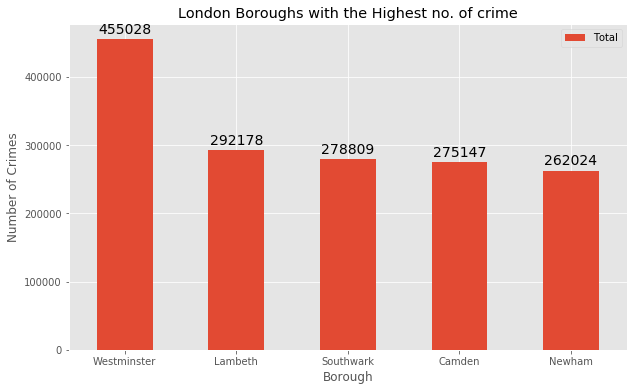

In [178]:
df_tt = df_top5[['Borough','Total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<h4>Sort the total crimes in ascending order to see 5 boroughs with the highest number of crimes</h4>

In [179]:
Ld_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Ld_crime.head() 
df_bot5

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,15,16,33,17,24,561,114,780
20,Kingston upon Thames,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,10131,10610,5682,1332,1702,38226,21540,89306
26,Richmond upon Thames,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,16097,11722,4707,1420,1590,40858,20314,96771
28,Sutton,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,13207,14474,4586,1393,2308,39533,25409,100987
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,14973,17244,7346,1999,2338,40071,30037,114136


<h4>Visualize the five boroughs with the least number of crimes</h4>

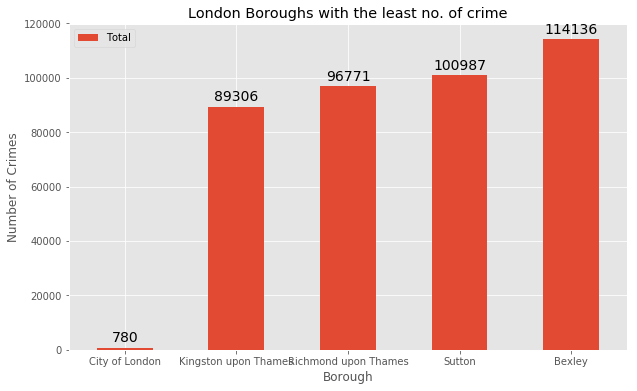

In [180]:
df_bt = df_bot5[['Borough','Total']]

df_bt.set_index('Borough',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The borough City of London has the lowest no. of crimes recorded for the year 2016, Looking into the details of the borough:

In [181]:
df_col = df_bot5[df_bot5['Borough'] == 'City of London']
df_col = df_col[['Borough','Total','Area (sq mi)','Population (2013 est)[1]']]
df_col

,Borough,Total,Area (sq mi),Population (2013 est)[1]
6,City of London,780,1.12,7000


<h4>As per the wikipedia page, The City of London is the 33rd principal division of Greater London but it is not a London borough.</h4>

URL:<a href="https://en.wikipedia.org/wiki/List_of_London_boroughs">https://en.wikipedia.org/wiki/List_of_London_boroughs</a>

<h4>Hence we will focus on the next borough with the least crime i.e. Kingston upon Thames</h4>

<h3>Visualizing different types of crimes in the borough 'Kingston upon Thames'</h3>

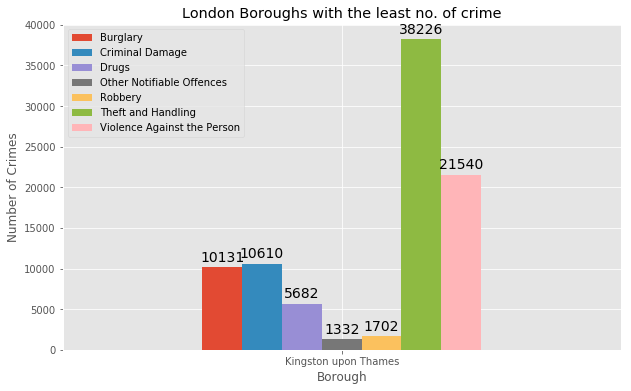

In [182]:
df_bc1 =  df_bot5[df_bot5['Borough'] == 'Kingston upon Thames']

df_bc = df_bc1[['Borough','Burglary','Criminal Damage','Drugs','Other Notifiable Offences',
                 'Robbery','Theft and Handling','Violence Against the Person']]


df_bc.set_index('Borough',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('London Boroughs with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

We can conclude that Kingston upon Thames is the safest borough when compared to the other boroughs in London.

<h3>Part 3: Creating a new dataset of the Neighborhoods of the safest borough in London and generating their co-ordinates.</h3>

The list of Neighborhoods in the Royal Borough of Kingston upon Thames was found on a wikipedia page: <a href="https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames">https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames</a>

In [184]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig.head()

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,


<h4>Find the Co-ordiantes of each Neighborhood in the Kingston upon Thames Neighborhood</h4>

In [185]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.30555280504926163, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [186]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig.head()

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145


<h4>Get the co-ordinates of Berrylands, London, United Kingdom (The center neighborhood of Kingston upon Thames)</h4>

In [187]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


<h4>Visualize the Neighborhood of Kingston upon Thames Borough</h4>

In [188]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

<h3>Modelling </h3>
<ul>
    <li>Finding all the venues within a 500 meter radius of each neighborhood.</li>
    <li>Perform one hot ecoding on the venues data.</li>
    <li>Grouping the venues by the neighborhood and calculating their mean.</li>
    <li>Performing a K-means clustering (Defining K = 5)</li>

<h4>Create a function to extract the venues from each Neighborhood</h4>

In [189]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [190]:
kut_venues = getNearbyVenues(names=kut_neig['Neighborhood'],
                                   latitudes=kut_neig['Latitude'],
                                   longitudes=kut_neig['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


In [191]:
print(kut_venues.shape)
kut_venues.head()

(240, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.393781,-0.284802,Surbiton Racket & Fitness Club,51.392676,-0.290224,Gym / Fitness Center
1,Berrylands,51.393781,-0.284802,Alexandra Park,51.394230,-0.281206,Park
2,Berrylands,51.393781,-0.284802,K2 Bus Stop,51.392302,-0.281534,Bus Stop
3,Berrylands,51.393781,-0.284802,Kamala Food and Wine,51.397810,-0.284045,Wine Shop
4,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park


In [192]:
kut_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,4,4,4,4,4,4
Canbury,14,14,14,14,14,14
Hook,5,5,5,5,5,5
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,100,100,100,100,100,100
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,8,8,8,8,8,8
Norbiton,27,27,27,27,27,27


In [193]:
print('There are {} uniques categories.'.format(len(kut_venues['Venue Category'].unique())))

There are 96 uniques categories.


<h4>One hot encoding</h4>
URL: <a href="https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f">https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f</a>

In [194]:
# one hot encoding
kut_onehot = pd.get_dummies(kut_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kut_onehot['Neighborhood'] = kut_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kut_onehot.columns[-1]] + list(kut_onehot.columns[:-1])
kut_onehot = kut_onehot[fixed_columns]

kut_onehot.head()

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,...,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Canbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4>Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category</h4>

In [195]:
kut_grouped = kut_onehot.groupby('Neighborhood').mean().reset_index()
kut_grouped

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,...,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store
0,Berrylands,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.25,0.00
1,Canbury,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.071429,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
2,Hook,0.00,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,...,0.200000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
3,Kingston Vale,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.250000,0.00,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
4,Kingston upon Thames,0.01,0.01,0.000000,0.000000,0.000000,0.030000,0.010000,0.01,0.000000,...,0.010000,0.030,0.000000,0.020000,0.01,0.000000,0.01,0.01,0.00,0.01
5,Malden Rushett,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
6,Motspur Park,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
7,New Malden,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,...,0.125000,0.125,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
8,Norbiton,0.00,0.00,0.037037,0.037037,0.037037,0.000000,0.000000,0.00,0.000000,...,0.037037,0.000,0.000000,0.037037,0.00,0.000000,0.00,0.00,0.00,0.00
9,Old Malden,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000,0.000000,0.000000,0.00,0.333333,0.00,0.00,0.00,0.00


In [196]:
kut_grouped.shape

(13, 97)

In [197]:
num_top_venues = 5

for hood in kut_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = kut_grouped[kut_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0              Bus Stop  0.25
1             Wine Shop  0.25
2  Gym / Fitness Center  0.25
3                  Park  0.25
4   Arts & Crafts Store  0.00


----Canbury----
               venue  freq
0                Pub  0.29
1              Hotel  0.07
2        Supermarket  0.07
3              Plaza  0.07
4  Fish & Chips Shop  0.07


----Hook----
               venue  freq
0                Pub   0.2
1  Indian Restaurant   0.2
2             Bakery   0.2
3  Fish & Chips Shop   0.2
4        Supermarket   0.2


----Kingston Vale----
                 venue  freq
0        Grocery Store  0.25
1                  Bar  0.25
2       Sandwich Place  0.25
3         Soccer Field  0.25
4  Arts & Crafts Store  0.00


----Kingston upon Thames----
                venue  freq
0         Coffee Shop  0.09
1      Clothing Store  0.06
2  Italian Restaurant  0.06
3                 Pub  0.05
4                Café  0.05


----Malden Rushett----
           venue  freq

<h4>Create a data frame of the venues</h4>
Function to sort the venues in descending order.

In [198]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [199]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = kut_grouped['Neighborhood']

for ind in np.arange(kut_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kut_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Wine Shop,Bus Stop,Park,Gym / Fitness Center,Golf Course,Grocery Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store
1,Canbury,Pub,Supermarket,Indian Restaurant,Café,Fish & Chips Shop,Spa,Park,Shop & Service,Hotel,Gym / Fitness Center
2,Hook,Pub,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
3,Kingston Vale,Soccer Field,Grocery Store,Bar,Sandwich Place,Women's Store,Department Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store
4,Kingston upon Thames,Coffee Shop,Italian Restaurant,Clothing Store,Pub,Café,Sushi Restaurant,Department Store,Hotel,Bakery,Bookstore


<h4>Clustering similar neighborhoods together using k - means clustering</h4>

In [200]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = kut_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 2, 1, 2, 1, 3, 2, 2, 4], dtype=int32)

In [201]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kut_merged = kut_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
kut_merged = kut_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kut_merged.head() # check the last columns!

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0.0,Wine Shop,Bus Stop,Park,Gym / Fitness Center,Golf Course,Grocery Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2.0,Pub,Supermarket,Indian Restaurant,Café,Fish & Chips Shop,Spa,Park,Shop & Service,Hotel,Gym / Fitness Center
2,Chessington,Kingston upon Thames,51.358336,-0.298622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coombe,Kingston upon Thames,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hook,Kingston upon Thames,51.367898,-0.307145,2.0,Pub,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Donut Shop


In [202]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              15 non-null object
Borough                   15 non-null object
Latitude                  15 non-null float64
Longitude                 15 non-null float64
Cluster Labels            13 non-null float64
1st Most Common Venue     13 non-null object
2nd Most Common Venue     13 non-null object
3rd Most Common Venue     13 non-null object
4th Most Common Venue     13 non-null object
5th Most Common Venue     13 non-null object
6th Most Common Venue     13 non-null object
7th Most Common Venue     13 non-null object
8th Most Common Venue     13 non-null object
9th Most Common Venue     13 non-null object
10th Most Common Venue    13 non-null object
dtypes: float64(3), object(12)
memory usage: 1.8+ KB


In [203]:
# Dropping the row with the NaN value 
kut_merged.dropna(inplace = True)

In [204]:
kut_merged.shape

(13, 15)

In [205]:
kut_merged['Cluster Labels'] = kut_merged['Cluster Labels'].astype(int)

In [206]:
kut_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 14
Data columns (total 15 columns):
Neighborhood              13 non-null object
Borough                   13 non-null object
Latitude                  13 non-null float64
Longitude                 13 non-null float64
Cluster Labels            13 non-null int64
1st Most Common Venue     13 non-null object
2nd Most Common Venue     13 non-null object
3rd Most Common Venue     13 non-null object
4th Most Common Venue     13 non-null object
5th Most Common Venue     13 non-null object
6th Most Common Venue     13 non-null object
7th Most Common Venue     13 non-null object
8th Most Common Venue     13 non-null object
9th Most Common Venue     13 non-null object
10th Most Common Venue    13 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 1.6+ KB


<h4>Visualize the clusters</h4>

In [207]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kut_merged['Latitude'], kut_merged['Longitude'], kut_merged['Neighborhood'], kut_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

<h3>Analysis</h3>

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.

<h4>Examine the first cluster</h4>

In [208]:
kut_merged[kut_merged['Cluster Labels'] == 0]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,0,Wine Shop,Bus Stop,Park,Gym / Fitness Center,Golf Course,Grocery Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store


<h4>Examine the second cluster</h4>

In [209]:
kut_merged[kut_merged['Cluster Labels'] == 1]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,1,Soccer Field,Grocery Store,Bar,Sandwich Place,Women's Store,Department Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,1,Grocery Store,Restaurant,Garden Center,Pub,Women's Store,Farmers Market,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,1,Grocery Store,Pharmacy,Bowling Alley,Pizza Place,Coffee Shop,Restaurant,Sandwich Place,Bus Stop,Soccer Field,Italian Restaurant


<h4>Examine the third cluster</h4>

In [210]:
kut_merged[kut_merged['Cluster Labels'] == 2]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canbury,Kingston upon Thames,51.417499,-0.305553,2,Pub,Supermarket,Indian Restaurant,Café,Fish & Chips Shop,Spa,Park,Shop & Service,Hotel,Gym / Fitness Center
4,Hook,Kingston upon Thames,51.367898,-0.307145,2,Pub,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Donut Shop
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,2,Coffee Shop,Italian Restaurant,Clothing Store,Pub,Café,Sushi Restaurant,Department Store,Hotel,Bakery,Bookstore
9,New Malden,Kingston upon Thames,51.405335,-0.263407,2,Gym,Gastropub,Indian Restaurant,Bar,Sushi Restaurant,Supermarket,Chinese Restaurant,Korean Restaurant,Women's Store,Fast Food Restaurant
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,2,Indian Restaurant,Pub,Italian Restaurant,Food,Breakfast Spot,Pharmacy,Pizza Place,Platform,Dry Cleaner,Rental Car Location
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,2,Indian Restaurant,Pub,Coffee Shop,Harbor / Marina,Fish & Chips Shop,Pet Café,Golf Course,Park,Restaurant,Chinese Restaurant
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,2,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Pharmacy,Breakfast Spot,Gym / Fitness Center,French Restaurant,Hotel,Farmers Market


<h4> Examine the forth cluster</h4>

In [211]:
kut_merged[kut_merged['Cluster Labels'] == 3]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,3,Construction & Landscaping,Soccer Field,Park,Gym,Auto Garage,Department Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant


<h4>Examine the fifth cluster</h4>

In [212]:
kut_merged[kut_merged['Cluster Labels'] == 4]

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Old Malden,Kingston upon Thames,51.382484,-0.25909,4,Food,Train Station,Pub,Fast Food Restaurant,Deli / Bodega,Department Store,Dessert Shop,Donut Shop,Dry Cleaner,Electronics Store


<h3>Results and Discussion</h3>

The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 2 and 5 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the third cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

<h3>Conclusion</h3>

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.